In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os
import glob

In [2]:
path = os.getcwd()
all_files = glob.glob(path + "/dataset/*.data")
filesnames = os.listdir('dataset/')

In [3]:
dataset_header = [
                [   "sex", "length", "diameter", "height", "whole_height",
                    "shucked_height", "viscera_weight", "shell_weight", "rings" ], 
                [   "sample_code_number", "clump_thickness", "uniformity_cell_size", "uniformity_cell_shape",
                    "marginal_adhesion", "single_epithelial_cell_size", "bare_nuclei", "bland_chromatin",
                    "normal_nucleoli", "mitosis", "class"],
                [   "buying", "maint", "doors", "persons", "lug_boot", "safety", "class"],
                [   "X", "Y", "month", "day", "FFMC", "DMC", "DC", "ISI", "temp", "RH", "wind", "rain", "area"],
                [   "class", "infants", "water", "budget", "physician", "salvador", "religious", "satellite",
                    "aid", "missile", "immigration", "synfuels", "education", "superfund", "crime", 
                    "duty_free_exports", "eaa_rsa"],
                [   "vendor", "model", "myct", "mmin", "mmax", "cach", "chmin", "chmax", "PRP", "ERP"] 
]

## Loading Data

In [4]:
# Load Data
# 1. It loads dataset from the folder. 
# 2. It checks whether the original data already has header or not. 
# 3. If there is no header in the data, it reads .data file as csv with header.
# 4. If there is header in the data, it reads .data file as csv. 

def open_csv_dataset(dataset_keyword, column_header):
    for i in all_files:
        if dataset_keyword in i:
            indexed = all_files.index(i)
            if column_header == True:
                df = pd.read_csv(i, header=None, names = dataset_header[indexed])
            else:
                df = pd.read_csv(i)
    return df

## Handling Missing Values

In [5]:
# Handling Missing Values
# 1. It replaces "?" values to NaN value in the dataframe.
# 2. If there is no null values in the dataframe, it returns dataframe
# 3. If there is null values in the dataframe, it fills missing values with the feature (column) mean.

def handling_missing_values(df):
    df = df.replace('?', np.NaN)
    if df.isnull().values.any() == False:
        return df
    else:
        for i in range(0, len(df.isnull().sum().values)):
            if df.isnull().sum().values[i] >0:
                missing_data = df.isnull().sum().index[i]
        df[missing_data]= pd.to_numeric(df[missing_data])
        df[missing_data]= df[missing_data].fillna(df[missing_data].mean())
    return df

## Handling Categorical Data

In [6]:
# Unique value in columns
# 1. It categorizes all columns in the dataset. 

def view_unique_value_in_columns(df):
    for i in df.columns.values:
        print(categorize_dataset(df, i))

In [7]:
# Unique value in single columns
# 1. It categorizes single columns in the dataset. 

def view_unique_value_in_single_column(df, columns):
    print(categorize_dataset(df, columns))

In [8]:
# Categorize Dataset
# 1. To categroize dataset, it uses unique function.
# 2. For unique function, it returns in order of appearance.
# 3. It shows columns and numeric values in each feature values. 

def categorize_dataset(df, columns):
    dicts = {}
    unique_list = list(df[columns].unique())
    for i in range(0, len(unique_list)):
        dicts[unique_list[i]] = i
    return {columns: dicts}

In [9]:
# Replace to numeric single/multiple columns in the dataset
# 1. Based on categorize dataset function, it replaces string value to numeric values for single/multiple columns

def replacing_string_to_numeric_multiple_columns(df, string_columns ):
    for i in string_columns:
        df = df.replace(categorize_dataset(df,i))
    return df

In [10]:
# Replace to numeric all columns in the dataset
# 1. Based on categorize dataset function, it replaces string value to numeric values for all columns.

def replacing_string_to_numeric_all_columns(df):
    for i in df.columns.values:
        df = df.replace(categorize_dataset(df, i))
    return df

## Log Transform

In [11]:
# Log Transform
# 1. This function is used to apply for Forest Fires data. 
# 2. Based on note, it shows the output area is very skewed toward 0.0. The authors recommend a log transform.
# 3. It log transform certain columns in the dataset. 

def log_transform(x):
    return np.log(x + 1)

## Discretization

In [12]:
# Discretization
# This function is used to transform real-valued data into a series of discretized values
# 1. For discretization, it has two method: Equal Width , Equal Frequency
# 2. For Equal width, it divides the data into n intervals of equal size.
#  2.1 Width of the k interval is (max - min) /n. 
#  2.2 It replaces discretized values with dataset
# 3. For Equal Frequency, it uses pandas function: qcut().
#  3.1 Based on padas, it discretize variable into equal-sized buckets based on rank or based on sample quantiles.
#  3.2 It replaces discretized values with the dataset

def discretization(df, n, method, columns):
    if method =="equal_width":
        for i in columns:
            max_val = np.amax(df[i].values)
            min_val = np.amin(df[i].values)
            bin_size = (max_val - min_val) / n
            result =[]
            for j in df[i].values:
                bin_num = int( j // bin_size )
                if bin_num > n - 1:
                    bin_num = n - 1
                result.append( bin_num )
            df[i] = df[i].replace(df[i].values,result)
            result.clear()
        return df
    if method == "equal_frequency":
        for i in columns:
            result = pd.qcut(df[i].values,n, labels=False, duplicates='drop')
            df[i] = df[i].replace(df[i].values,result)
        return df

## Standardization

In [13]:
# Split dataset
# 1. It splits the dataset into two: training set and test set.
# 2. Training set has 80% of original dataset. 
# 3. Testing set has 20% of original dataset. 

def split_dataset(df, train_perc):
    train_end_ind = int(round(df.shape[0] * train_perc))
    train = df.iloc[0:train_end_ind]
    test = df.iloc[train_end_ind:-1]
    return (train, test)

In [14]:
# Z-score standardization
# It computes z-score by (observed value - mean of the sample) / standard deviation of the sample

def z_score_standardization(df):
    z_score = (df-df.mean())/df.std()
    return z_score

In [15]:
# Standardization
# 1. It applies z-score standardization for training set and testign set. 

def Standardization(training, testing):
    training_zscore = z_score_standardization(training)
    testing_zscore = z_score_standardization(testing)
    return (training_zscore, testing_zscore)

## Cross-validation

In [16]:
#K-fold cross validation
# 1. Split dataset into training and testset using split_dataset function.
# 2. With training set, it splits training set into k-equaled size. 
# 3. It returns k-equal-sized training partitions, and test set. 

def cross_validation(df, percent, k):
    train, test  = split_dataset(df, percent)
    train_size= len(train)
    fold_size = train_size//k 
    remainder = train_size %k
    train_folds = []
    start = 0
    for i in range(0,k):
        if i < remainder:
            fold =  train.iloc[start : start+fold_size+1]
            train_folds.append(fold)
            start +=  fold_size + 1
        else:
            fold =  train.iloc[start : start+fold_size]
            train_folds.append(fold)
            start +=  fold_size
    return train_folds, test

## Evaluation Metrics

In [17]:
# Evaluation Metrics
# It used to evaluate the efficacy of a machine learning algorithm on a dataset. 
# 1. Classification score
#  1.1 It computes accuracy score between predicted values and observed values
# 2. MSE
#  2.1 It compute MSE by sum of square of difference between actual and predicted and divide by number of points.
# 3. MAE
#  3.1 It compute MAE by sum of absolute of (prediction - true value) and divide by number of points.
# 4. R Square
#  4.1 R squared is computed by 1 - RSS (sum of squares of residuals)/ TSS (total sum of squares)
# 5. Pearson’s correlation
#  5.1 Pearson's correlation is computed by Covariance of X and Y / (stadard deviation of X * stadard deviation of Y)

def evaluation_metrics(y_true, y_pred, method):
    diff = np.subtract(y_true, y_pred)
    if method =="classification score":
        count = 0
        if len(y_pred) ==len(y_true):
            for i in range(len(y_pred)):
                if y_pred[i] == y_true[i]:
                    count +=1
        accuracy_score = count / len(y_pred)
        return accuracy_score
    if method =="MSE":
        return np.mean(diff**2)
    if method =="MAE":
        return np.mean(abs(diff))
    if method =="R square":
        y_bar = y.mean()
        TSS = ((y-y_bar)**2).sum()
        RSS = (diff**2).sum()
        return 1 - (RSS/TSS)
    if method =="Pearson_correlation":
        covariance = np.cov(y_true, y_pred)
        pearson = covariance / (np.std(y_true) * np.std(y_pred))
        return pearson


In [18]:
# For this project, it demonstrate the evaluation metrics for classification and regression 
# by averaging the predictions over all of the folds of the dataset.

def evaluation_metrics_for_classification_and_regression(prediction):
    return round(np.mean(prediction),2)

## Naive Majority Predictor Algorithm for Classification

In [19]:
# Naive Majority predictor Algorithm
# 1. Using training valiation set from 5-fold cross-valiation, 
#    it rotates the fold to use training set for 4 fold, and remaining fold for test set. 
# 2. It finds the most common label from each rotating 4 fold.
# 3. It counts the most common labels from previous steps. 
# 4. It divides the counts that matches with most common labels to calcualte the accuracy.


def majority_predictor_classification(train_val, predictor):
    accuracy = []
    print("Accuracy for Each Fold")
    for i in range(0, len(train_val)):
        k_validate = pd.concat([x for j,x in enumerate(train_val) if j!=i])
        count = 0
        for k in range(len(train_val[i])):
            if train_val[i][predictor].values[k] == k_validate[predictor].value_counts().index[0]:
                count +=1
        result = count / len(train_val[i])
        result = round(result*100, 2)
        accuracy.append(result)
        print("Fold " + str(i+1) + " : " + str(result) +"%")
    return accuracy

## Naive Majority Predictor Algorithm for Regression

In [20]:
# Naive Mean Regressor Algorithm
# 1. Using training valiation set from 5-fold cross-valiation, 
#    it rotates the fold to use training set for 4 fold, and remaining fold for test set. 
# 2. It finds the mean values from each rotating 4 fold.
# 3. It counts the mean values from previous steps. 
# 4. It divides the counts that matches with mean values to calcualte the accuracy.

def majority_predictor_regression(train_val, predictor):
    accuracy = []
    for i in range(0, len(train_val)):
        k_validate = pd.concat([x for j,x in enumerate(train_val) if j!=i])
        count = 0
        for k in range(len(train_val[i])):
            if train_val[i][predictor].values[k] == round(k_validate[predictor].mean()):
                count +=1
        result = count / len(train_val[i])
        result = round(result*100, 2)
        accuracy.append(result)
        print("Fold " + str(i+1) + " : " + str(result) +"%")
    return accuracy

## Breast Cancer Wisconsin Dataset

In [21]:
breast_cancer_dataset = open_csv_dataset('breast-cancer', True)
breast_cancer_dataset.head(3)

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2


In [22]:
clean_breast_cancer_dataset = handling_missing_values(breast_cancer_dataset)

In [23]:
clean_breast_cancer_dataset.isnull().sum().any()

False

In [24]:
clean_breast_cancer_dataset.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [25]:
breast_cancer_dataset_v1  = clean_breast_cancer_dataset.copy()
breast_cancer_dataset_v1 = breast_cancer_dataset_v1.drop(['sample_code_number'], axis=1)

In [26]:
breast_cancer_dataset_v1.head(3)

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2


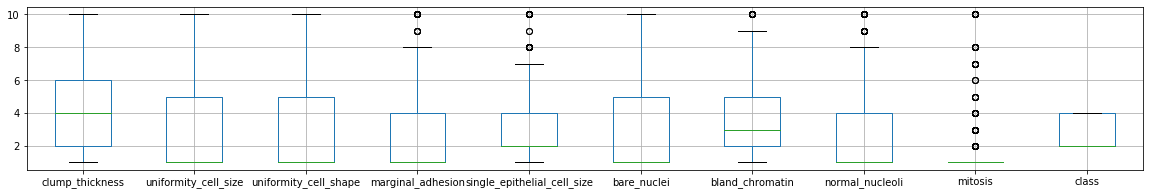

In [27]:
breast_cancer_dataset_v1.boxplot(figsize=(20,3))

In [28]:
breast_cancer_dataset_v1.describe()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [29]:
train_breast_cancer_dataset, test_breast_cancer_dataset = split_dataset(breast_cancer_dataset_v1, 0.8)

In [30]:
train_breast_cancer_zscore_dataset, test_breast_cancer_zscore_dataset  = Standardization(train_breast_cancer_dataset,
                                                                                         test_breast_cancer_dataset)

In [31]:
train_breast_cancer_zscore_dataset.head(3)

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
0,0.156603,-0.732641,-0.771925,-0.648009,-0.565366,-0.757436,-0.212312,-0.646149,-0.362217,-0.763234
1,0.156603,0.263014,0.242588,0.743872,1.593374,1.683465,-0.212312,-0.323074,-0.362217,-0.763234
2,-0.529994,-0.732641,-0.771925,-0.648009,-0.565366,-0.486225,-0.212312,-0.646149,-0.362217,-0.763234


In [32]:
test_breast_cancer_zscore_dataset.head(3)

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
559,0.46445,-0.568613,-0.623083,-0.563735,-0.488231,-0.502206,-0.417150,-0.466656,-0.262057,-0.566992
560,0.46445,-0.568613,-0.623083,-0.563735,-0.488231,-0.502206,-0.059225,-0.466656,-0.262057,-0.566992
561,0.46445,-0.568613,-0.623083,-0.563735,-0.488231,-0.502206,-0.059225,-0.466656,-0.262057,-0.566992


In [33]:
validated_train_breast_cancer, validated_test_breast_cancer = cross_validation(breast_cancer_dataset_v1,0.8,5)

In [34]:
validated_test_breast_cancer.shape[0]

139

In [35]:
validated_train_breast_cancer_size = []
for i in range(0, 5):
    validated_train_breast_cancer_size.append(validated_train_breast_cancer[i].shape[0])
validated_train_breast_cancer_size

[112, 112, 112, 112, 111]

In [36]:
breast_cancer_accuracy = majority_predictor_classification(validated_train_breast_cancer, 'class')

Accuracy for Each Fold
Fold 1 : 52.68%
Fold 2 : 60.71%
Fold 3 : 50.0%
Fold 4 : 75.0%
Fold 5 : 77.48%


In [37]:
print("Accuracy: " + str(evaluation_metrics_for_classification_and_regression(breast_cancer_accuracy))+ "%")

Accuracy: 63.17%


## Car Evaluation

In [38]:
car_dataset = open_csv_dataset('car', True)
car_dataset.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [39]:
clean_car_dataset = handling_missing_values(car_dataset)

In [40]:
clean_car_dataset.isnull().sum().any()

False

In [41]:
clean_car_dataset.head(3)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [42]:
view_unique_value_in_columns(clean_car_dataset)

{'buying': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}}
{'maint': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}}
{'doors': {'2': 0, '3': 1, '4': 2, '5more': 3}}
{'persons': {'2': 0, '4': 1, 'more': 2}}
{'lug_boot': {'small': 0, 'med': 1, 'big': 2}}
{'safety': {'low': 0, 'med': 1, 'high': 2}}
{'class': {'unacc': 0, 'acc': 1, 'vgood': 2, 'good': 3}}


In [43]:
categorized_car_datast = replacing_string_to_numeric_all_columns(clean_car_dataset)

In [44]:
car_dataset_v1  = categorized_car_datast.copy()
car_dataset_v1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,2,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0


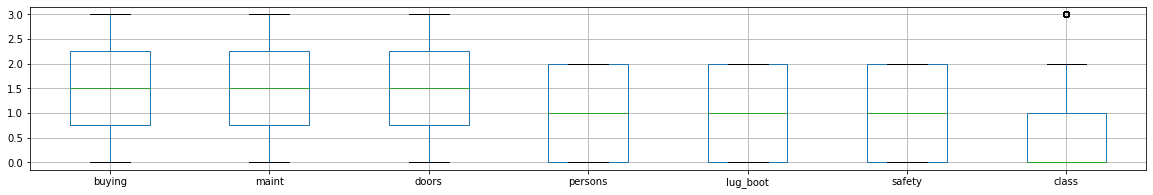

In [45]:
car_dataset_v1.boxplot(figsize=(20,3))

In [46]:
car_dataset_v1.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.417245
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.747188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [47]:
train_car_dataset, test_car_dataset = split_dataset(car_dataset_v1, 0.8)

In [48]:
train_car_zscore_dataset,test_car_zscore_dataset  = Standardization(train_car_dataset,test_car_dataset)

In [49]:
train_car_zscore_dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,-1.213078,-1.231609,-1.328598,-1.218782,-1.221869,-1.223638,-0.536576
1,-1.213078,-1.231609,-1.328598,-1.218782,-1.221869,0.000886,-0.536576
2,-1.213078,-1.231609,-1.328598,-1.218782,-1.221869,1.225410,-0.536576
3,-1.213078,-1.231609,-1.328598,-1.218782,0.002658,-1.223638,-0.536576
4,-1.213078,-1.231609,-1.328598,-1.218782,0.002658,0.000886,-0.536576


In [50]:
test_car_zscore_dataset.head()

,buying,maint,doors,persons,lug_boot,safety,class
1382,NaN,-2.011622,1.232516,-1.242689,-0.007090,1.222969,-0.738512
1383,NaN,-2.011622,1.232516,-1.242689,1.215910,-1.222969,-0.738512
1384,NaN,-2.011622,1.232516,-1.242689,1.215910,0.000000,-0.738512
1385,NaN,-2.011622,1.232516,-1.242689,1.215910,1.222969,-0.738512
1386,NaN,-2.011622,1.232516,-0.014243,-1.230089,-1.222969,-0.738512


In [51]:
validated_train_car, validated_test_car = cross_validation(car_dataset_v1,0.8,5)

In [52]:
validated_test_car.shape[0]

345

In [53]:
validated_train_car_size = []
for i in range(0, 5):
    validated_train_car_size.append(validated_train_car[i].shape[0])
validated_train_car_size

[277, 277, 276, 276, 276]

In [54]:
car_accuracy = majority_predictor_classification(validated_train_car, 'class')

Accuracy for Each Fold
Fold 1 : 94.22%
Fold 2 : 79.42%
Fold 3 : 66.67%
Fold 4 : 65.22%
Fold 5 : 60.51%


In [55]:
print("Accuracy: " + str(evaluation_metrics_for_classification_and_regression(car_accuracy))+ "%")

Accuracy: 73.21%


## Congressional Vote

In [56]:
vote_dataset = open_csv_dataset('vote', True)
vote_dataset.head()

,class,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [57]:
vote_dataset.isnull().sum().any()

False

In [58]:
categorized_vote_datast = replacing_string_to_numeric_all_columns(vote_dataset)
categorized_vote_datast.head()

,class,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
2,1,1,0,1,1,0,0,0,0,0,1,2,1,0,0,0,2
3,1,0,0,1,2,1,0,0,0,0,1,2,1,0,1,0,0
4,1,2,0,1,2,0,0,0,0,0,1,2,2,0,0,1,0


In [59]:
vote_dataset_v1  = categorized_vote_datast.copy()

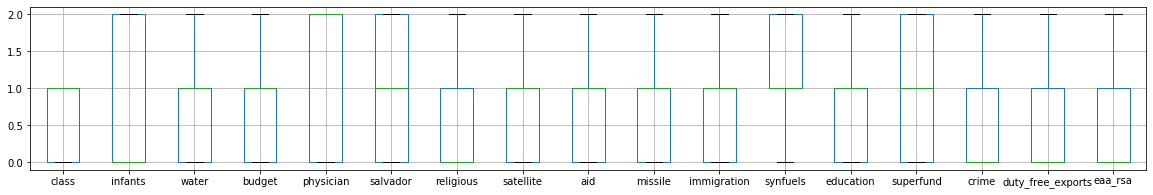

In [60]:
vote_dataset_v1.boxplot(figsize=(20,3))

In [61]:
vote_dataset_v1.describe()

,class,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.613793,0.887356,0.662069,0.632184,1.160920,0.990805,0.40000,0.613793,0.625287,0.577011,0.519540,1.296552,0.678161,0.981609,0.468966,0.528736,0.524138
std,0.487440,0.980784,0.667418,0.532686,0.975194,0.983696,0.53967,0.549648,0.551332,0.588230,0.531462,0.553049,0.601347,0.971783,0.572671,0.615452,0.731920
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.00000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [62]:
train_vote_dataset, test_vote_dataset = split_dataset(vote_dataset_v1, 0.8)

In [63]:
train_vote_zscore_dataset, test_vote_zscore_dataset  = Standardization(train_vote_dataset,test_vote_dataset)

In [64]:
train_vote_zscore_dataset.head()

,class,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,-1.261914,-0.884650,-1.053936,-1.196196,-1.226394,-1.056348,-0.804116,-1.172251,-1.143039,-1.023842,-0.978822,-2.382466,-1.144915,-1.060014,-0.817352,-0.911024,-0.720526
1,-1.261914,-0.884650,-1.053936,-1.196196,-1.226394,-1.056348,-0.804116,-1.172251,-1.143039,-1.023842,0.913567,-0.510913,-1.144915,-1.060014,-0.817352,-0.911024,0.657183
2,0.790170,0.134748,-1.053936,0.695969,-0.197996,-1.056348,-0.804116,-1.172251,-1.143039,-1.023842,0.913567,1.360641,0.522158,-1.060014,-0.817352,-0.911024,2.034892
3,0.790170,-0.884650,-1.053936,0.695969,0.830402,-0.043651,-0.804116,-1.172251,-1.143039,-1.023842,0.913567,1.360641,0.522158,-1.060014,0.906517,-0.911024,-0.720526
4,0.790170,1.154146,-1.053936,0.695969,0.830402,-1.056348,-0.804116,-1.172251,-1.143039,-1.023842,0.913567,1.360641,2.189230,-1.060014,-0.817352,0.690170,-0.720526


In [65]:
test_vote_zscore_dataset.head()

,class,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
348,0.784475,1.042101,0.815111,0.653955,0.971877,1.276951,1.563157,0.772215,0.689350,1.001449,-0.97857,-0.638793,-1.069063,1.276951,1.001449,1.237494,0.653381
349,-1.259915,-0.994733,-0.778060,0.653955,-1.066694,-0.834929,-0.505020,0.772215,0.689350,1.001449,0.85093,-0.638793,-1.069063,-0.834929,-0.830990,-0.662943,-0.684495
350,0.784475,-0.994733,-0.778060,-1.160242,0.971877,1.276951,-0.505020,0.772215,-1.107139,1.001449,0.85093,0.976978,0.572712,1.276951,1.001449,1.237494,-0.684495
351,-1.259915,-0.994733,0.815111,0.653955,-1.066694,-0.834929,-0.505020,0.772215,0.689350,1.001449,-0.97857,-0.638793,-1.069063,-0.834929,-0.830990,1.237494,-0.684495
352,0.784475,-0.994733,-0.778060,-1.160242,-1.066694,1.276951,-0.505020,0.772215,0.689350,1.001449,0.85093,0.976978,0.572712,-0.834929,1.001449,1.237494,0.653381


In [66]:
validated_train_vote, validated_test_vote = cross_validation(vote_dataset_v1,0.8,5)

In [67]:
validated_test_vote.shape[0]

86

In [68]:
validated_train_vote_size = []
for i in range(0, 5):
    validated_train_vote_size.append(validated_train_vote[i].shape[0])
validated_train_vote_size

[70, 70, 70, 69, 69]

In [69]:
vote_accuracy = majority_predictor_classification(validated_train_vote, 'class')

Accuracy for Each Fold
Fold 1 : 60.0%
Fold 2 : 61.43%
Fold 3 : 67.14%
Fold 4 : 57.97%
Fold 5 : 60.87%


In [70]:
print("Accuracy: " + str(evaluation_metrics_for_classification_and_regression(vote_accuracy))+ "%")

Accuracy: 61.48%


## Abalone

In [71]:
abalone_dataset = open_csv_dataset('abalone', True)
abalone_dataset.head(3)

,sex,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9


In [72]:
abalone_dataset.isnull().sum().any()

False

In [73]:
categorized_abalone_datast = replacing_string_to_numeric_multiple_columns(abalone_dataset, ['sex'])

In [74]:
abalone_dataset_v1  = categorized_abalone_datast.copy()

In [75]:
abalone_dataset_v1.head()

,sex,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [76]:
abalone_discretize_dataset = abalone_dataset_v1.copy()

In [77]:
abalone_discretize_dataset = discretization(abalone_discretize_dataset, 5, 'equal_frequency',
                                           ['length', 'diameter', 'height', 'whole_height',
                                            'shucked_height', 'viscera_weight', 'shell_weight', 'rings'])

In [78]:
abalone_dataset_v2 =  abalone_discretize_dataset.copy()
abalone_dataset_v2.tail(5)

,sex,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
4172,1,2.0,2.0,3.0,2.0,2.0,3.0,2.0,3
4173,0,3.0,2.0,2.0,3.0,3.0,3.0,2.0,2
4174,0,3.0,3.0,4.0,3.0,3.0,4.0,3.0,1
4175,1,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2
4176,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3


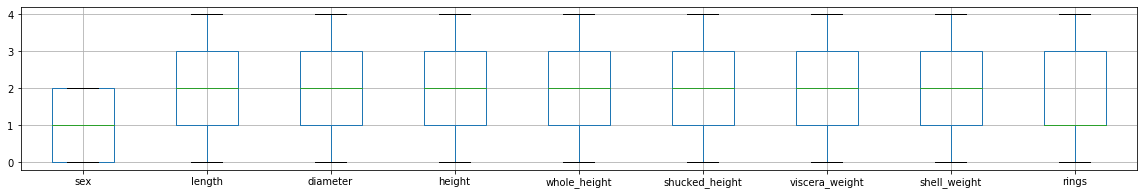

In [79]:
abalone_dataset_v2.boxplot(figsize=(20,3))

In [80]:
abalone_dataset_v2.describe()

,sex,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,1.971032,1.960498,1.922432,1.999282,1.998324,1.996169,1.994494,1.809672
std,0.827815,1.412815,1.403376,1.372701,1.414806,1.415651,1.415055,1.412932,1.383026
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
max,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [81]:
train_abalone_dataset, test_abalone_dataset = split_dataset(abalone_dataset_v2, 0.8)

In [82]:
train_abalone_zscore_dataset,test_abalone_zscore_dataset  = Standardization(train_abalone_dataset,
                                                                             test_abalone_dataset)

In [83]:
train_abalone_zscore_dataset.head()

,sex,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
0,-1.145095,-0.672678,-0.672932,-1.394988,-0.693372,-0.687929,-0.695619,-0.695095,1.535677
1,-1.145095,-1.379401,-1.385073,-1.394988,-1.400066,-1.395114,-1.403094,-1.402467,-1.313189
2,0.070568,0.034046,0.039208,0.062586,0.013322,-0.687929,0.011855,0.012276,-0.600973
3,-1.145095,-0.672678,-0.672932,-0.666201,-0.693372,-0.687929,-0.695619,-0.695095,0.111244
4,1.286231,-1.379401,-1.385073,-1.394988,-1.400066,-1.395114,-1.403094,-1.402467,-1.313189


In [84]:
test_abalone_zscore_dataset.head()

,sex,length,diameter,height,whole_height,shucked_height,viscera_weight,shell_weight,rings
3342,-1.194077,-0.746012,-0.729746,-1.421310,-1.466046,-1.480215,-0.736179,-0.737816,1.809127
3343,-0.012748,-0.746012,-0.729746,-0.693641,-0.757655,-0.774787,-1.440277,-0.737816,1.809127
3344,1.168580,-0.746012,-0.729746,0.034028,-0.757655,-0.774787,-0.736179,-0.028083,1.809127
3345,-0.012748,-0.746012,-0.729746,0.034028,-0.757655,-0.774787,-0.032081,-0.028083,1.032190
3346,1.168580,-0.746012,-0.014578,0.761697,-0.757655,-0.774787,-1.440277,-0.028083,1.809127


In [85]:
validated_train_abalone, validated_test_abalone = cross_validation(abalone_dataset_v2,0.8,5)

In [86]:
validated_test_abalone.shape[0]

834

In [87]:
validated_train_abalone_size = []
for i in range(0, 5):
    validated_train_abalone_size.append(validated_train_abalone[i].shape[0])
validated_train_abalone_size

[669, 669, 668, 668, 668]

In [88]:
abalone_accuracy = majority_predictor_regression(validated_train_abalone, 'rings')

Fold 1 : 12.56%
Fold 2 : 12.11%
Fold 3 : 22.16%
Fold 4 : 10.63%
Fold 5 : 15.87%


In [89]:
print("Accuracy: " + str(evaluation_metrics_for_classification_and_regression(abalone_accuracy))+ "%")

Accuracy: 14.67%


## Computer Hardware

In [90]:
computer_dataset = open_csv_dataset('machine', True)
computer_dataset.head()

,vendor,model,myct,mmin,mmax,cach,chmin,chmax,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [91]:
computer_dataset.isnull().sum().any()

False

In [92]:
computer_ERP  = computer_dataset['ERP']
computer_dataset = computer_dataset.drop(['vendor', 'model', 'ERP'], axis = 1)

In [93]:
computer_dataset_v1  = computer_dataset.copy()
computer_dataset_v1.head()

,myct,mmin,mmax,cach,chmin,chmax,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [94]:
computer_discretize_dataset = computer_dataset_v1.copy()

In [95]:
computer_discretize_dataset = discretization(computer_discretize_dataset, 
                                             5, 
                                             'equal_frequency', 
                                             ['myct','mmin', 'mmax', 'cach', 'chmin', 'chmax', 'PRP'])

In [96]:
computer_discretize_dataset.head()

,myct,mmin,mmax,cach,chmin,chmax,PRP
0,2,0,1,3,3,4,4
1,0,4,4,2,2,4,4
2,0,4,4,2,2,4,4
3,0,4,4,2,2,4,4
4,0,4,3,2,2,3,3


In [97]:
computer_dataset_v2 =  computer_discretize_dataset.copy()

In [98]:
computer_dataset_v2.describe()

,myct,mmin,mmax,cach,chmin,chmax,PRP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.870813,1.775120,1.799043,1.114833,1.014354,1.923445,1.971292
std,1.492790,1.327285,1.496084,1.150343,1.102787,1.422307,1.434177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,3.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000


In [99]:
train_computer_dataset, test_computer_dataset = split_dataset(computer_dataset_v2, 0.8)

In [100]:
train_computer_zscore_dataset, test_computer_zscore_dataset  = Standardization(train_computer_dataset,
                                                                               test_computer_dataset)

In [101]:
train_computer_zscore_dataset.head()

,myct,mmin,mmax,cach,chmin,chmax,PRP
0,0.078374,-1.366320,-0.526476,1.755516,1.926317,1.465872,1.460984
1,-1.230475,1.717132,1.518209,0.861702,0.985689,1.465872,1.460984
2,-1.230475,1.717132,1.518209,0.861702,0.985689,1.465872,1.460984
3,-1.230475,1.717132,1.518209,0.861702,0.985689,1.465872,1.460984
4,-1.230475,1.717132,0.836648,0.861702,0.985689,0.768434,0.761889


In [102]:
test_computer_zscore_dataset.head()

,myct,mmin,mmax,cach,chmin,chmax,PRP
167,-1.336181,1.493254,0.650731,1.252582,0.575189,-0.053515,0.535333
168,-1.336181,1.493254,1.271196,1.252582,0.575189,-0.053515,1.221229
169,-1.336181,0.812994,0.650731,1.252582,1.388386,1.409221,1.221229
170,0.915192,-0.547527,-1.210663,-1.192935,-1.051207,-1.516250,-0.836458
171,0.915192,-0.547527,-1.210663,-1.192935,-1.051207,-1.516250,-0.836458


In [103]:
validated_train_computer, validated_test_computer = cross_validation(computer_dataset_v2,0.8,5)

In [104]:
validated_test_computer.shape[0]

41

In [105]:
validated_train_computer_size = []
for i in range(0, 5):
    validated_train_computer_size.append(validated_train_computer[i].shape[0])
validated_train_computer_size

[34, 34, 33, 33, 33]

In [106]:
computer_accuracy =majority_predictor_regression(validated_train_computer, 'PRP')

Fold 1 : 5.88%
Fold 2 : 17.65%
Fold 3 : 18.18%
Fold 4 : 18.18%
Fold 5 : 30.3%


In [107]:
print("Accuracy: " + str(evaluation_metrics_for_classification_and_regression(computer_accuracy))+ "%")

Accuracy: 18.04%


## Forest Fires

In [108]:
forest_dataset = open_csv_dataset('forest', False)
forest_dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [109]:
forest_dataset.isnull().sum().any()

False

In [110]:
categorized_forest_dataset = replacing_string_to_numeric_multiple_columns(forest_dataset,['month', 'day'])
categorized_forest_dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [111]:
forest_dataset_v1  = categorized_forest_dataset.copy()
forest_dataset_v1['area'] = log_transform(forest_dataset_v1['area'])
forest_dataset_v1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,0,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,1,1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,1,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [112]:
forest_discretize_dataset = forest_dataset_v1.copy()

In [113]:
forest_discretize_dataset = discretization(forest_discretize_dataset, 
                                           5, 
                                           'equal_frequency', 
                                           ['FFMC', 'DMC', 'DC', 'ISI','temp','RH', 'wind', 'rain', 'area'])

In [114]:
forest_dataset_v2 =  forest_discretize_dataset.copy()

In [115]:
forest_dataset_v2.describe()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.0,517.000000
mean,4.669246,4.299807,2.862669,2.802708,1.949710,1.986460,1.986460,1.992263,1.990329,1.963250,1.887814,0.0,0.601547
std,2.313778,1.229900,1.939616,1.930917,1.411945,1.418937,1.406591,1.418298,1.416235,1.421255,1.374951,0.0,0.802031
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,3.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
50%,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0,0.000000
75%,7.000000,5.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.0,1.000000
max,9.000000,9.000000,11.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0,2.000000


In [116]:
train_forest_dataset, test_forest_dataset = split_dataset(forest_dataset_v2, 0.8)

In [117]:
train_forest_zscore_dataset, test_forest_zscore_dataset  = Standardization(train_forest_dataset,test_forest_dataset)

In [118]:
train_forest_zscore_dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.005103,0.568575,-1.474724,-1.433140,-1.371752,-1.353630,-1.401555,-1.363352,-1.357297,0.797201,1.569715,NaN,-0.721168
1,1.005103,-0.243115,-0.958633,-0.910391,-0.629392,-1.353630,0.015402,-0.646163,0.123391,-0.653530,-1.308965,NaN,-0.721168
2,1.005103,-0.243115,-0.958633,-0.387642,-0.629392,-1.353630,0.723880,-0.646163,-0.616953,-0.653530,-1.308965,NaN,-0.721168
3,1.446367,1.380264,-1.474724,-1.433140,0.112968,-1.353630,-1.401555,0.071026,-1.357297,1.522567,0.130375,NaN,-0.721168
4,1.446367,1.380264,-1.474724,0.135107,-1.371752,-0.585955,-1.401555,0.788215,-1.357297,1.522567,-1.308965,NaN,-0.721168


In [119]:
test_forest_zscore_dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
414,0.223194,-0.255767,-0.448796,-0.034462,1.023925,0.727163,0.693524,0.426229,0.909915,0.494453,-0.129163,NaN,-0.877332
415,1.421395,1.374748,-0.448796,1.472041,1.023925,0.727163,0.693524,1.116313,0.909915,-1.420770,0.645817,NaN,1.643453
416,0.622595,-1.071025,1.784239,-1.038798,0.390953,0.727163,-0.750138,-0.263856,0.909915,-0.143955,-0.904144,NaN,0.383060
417,0.622595,0.559491,-1.565314,0.969873,1.023925,-1.945651,-1.471969,0.426229,-1.780269,-1.420770,1.420797,NaN,-0.877332
418,-0.975007,-0.255767,-0.448796,-0.034462,-0.242019,0.727163,-0.028307,-0.263856,0.909915,-0.143955,0.645817,NaN,0.383060


In [120]:
validated_train_forest, validated_test_forest = cross_validation(forest_dataset_v2,0.8,5)

In [121]:
validated_test_forest.shape[0]

102

In [122]:
validated_train_forest_size = []
for i in range(0, 5):
    validated_train_forest_size.append(validated_train_forest[i].shape[0])
validated_train_forest_size

[83, 83, 83, 83, 82]

In [123]:
forest_accuracy = majority_predictor_regression(validated_train_forest, 'area')

Fold 1 : 0.0%
Fold 2 : 2.41%
Fold 3 : 9.64%
Fold 4 : 24.1%
Fold 5 : 29.27%


In [124]:
print("Accuracy: " + str(evaluation_metrics_for_classification_and_regression(forest_accuracy))+ "%")

Accuracy: 13.08%
